<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/árboles_decisión.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Árboles de decisión </h1>

Los árboles de decisión son una técnica fundamental en el campo del machine learning, conocida por su capacidad para modelar decisiones complejas a través de estructuras jerárquicas fácilmente interpretables. Este modelo se basa en la división recursiva del espacio de características, donde cada nodo interno representa una pregunta sobre una característica específica, y cada hoja corresponde a una decisión o clasificación. Su versatilidad, interpretabilidad y capacidad para manejar datos tanto numéricos como categóricos los convierten en una herramienta poderosa para una variedad de problemas de aprendizaje automático, desde la clasificación hasta la regresión y la detección de anomalías. En este párrafo introductorio, exploraremos los principios básicos de los árboles de decisión y su aplicación en la construcción de modelos predictivos.

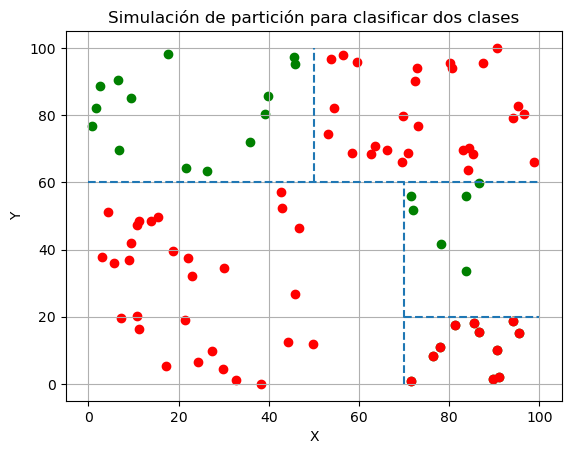

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random points
num_points = 100
x = np.random.uniform(0, 100, num_points)
y = np.random.uniform(0, 100, num_points)

# Define conditions for green and red points
green_indices = np.where(((y > 60) & (x < 50)) | ((x > 70) & (y < 60)))
red_indices = np.where(((y < 60) & (x < 50)) | ((x > 70) & (y < 20)) | ((y > 60) & (x > 50)))

# Plot green points
plt.scatter(x[green_indices], y[green_indices], color='green')

# Plot red points
plt.scatter(x[red_indices], y[red_indices], color='red')

plt.hlines(y = 60, xmin=0, xmax=100, linestyles='dashed')
plt.hlines(y = 20, xmin=70, xmax=100, linestyles='dashed')
plt.vlines(x = 70, ymin=0, ymax=60, linestyles='dashed')
plt.vlines(x = 50, ymin=60, ymax=100, linestyles='dashed')

# Plot parameters
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulación de partición para clasificar dos clases')
plt.grid(True)
plt.show()


La situación de la simulación anterior puede presentarse como:

<img src="img/AD.png">

Presentamos las siguientes definiciones:

- Nodo raíz: primer nodo del árbol
- Nodo de decisión: nodo intermedio que se divide en más nodos
- Nodo terminal: nodo final que representa la clasificación de alguna categoría
- Profundidad: cantidad de niveles del árbol

**Entropía:** se refiere a una medida de incertidumbre o desorden en un conjunto de datos; la entropía se utiliza para determinar la pureza de un nodo, es decir, cuánto se mezclan las clases de los datos en ese nodo. Se calcula como

$$H(Y) = - \sum_{i}^{n} p_{i} log_{2}(p_{i})$$

**Ganancia de información:** se refiere al valor obtenido al dividir un conjunto de datos en subconjuntos más pequeños y más homogéneos en términos de sus clases. Es una medida de cuánta información nueva se gana al realizar una división particular en un árbol de decisión o cualquier otro modelo de clasificación. Se calcula como

$$IG = H(Y) - H(Y \vert X)$$

<h2> Construcción de un árbol de decisión </h2>

Consideremos el problema de determinar si una persona será diagnosticada con diabetes con base en información de la cantidad de calorías por día que consume la persona, el nivel de azúcar en la sangre y la cantidad de actividad física que realiza la persona. Los datos son los siguientes

In [2]:
data = {
    'diabetes': [1,0,1,0,1,0,0,1,1,0],
    'calorías': ['Alto', 'Bajo', 'Moderado', 'Alto', 'Alto', 'Bajo', 'Moderado', 'Alto', 'Alto', 'Bajo'],
    'nivel_azucar': ['Alto', 'Moderado', 'Alto', 'Moderado', 'Alto', 'Bajo', 'Moderado', 'Moderado', 'Alto', 'Bajo'],
    'actividad_fisica': ['Moderado', 'Alto', 'Bajo', 'Alto', 'Bajo', 'Alto', 'Moderado', 'Bajo', 'Alto', 'Moderado']
}

In [3]:
import pandas as pd

In [4]:
data = pd.DataFrame(data)
data

,diabetes,calorías,nivel_azucar,actividad_fisica
0,1,Alto,Alto,Moderado
1,0,Bajo,Moderado,Alto
2,1,Moderado,Alto,Bajo
3,0,Alto,Moderado,Alto
4,1,Alto,Alto,Bajo
5,0,Bajo,Bajo,Alto
6,0,Moderado,Moderado,Moderado
7,1,Alto,Moderado,Bajo
8,1,Alto,Alto,Alto
9,0,Bajo,Bajo,Moderado


Dado que tenemos dos categorías en este problema, la fórmula de entropía se traduce en

$$H(Y) = -p*log_{2} (p) - (1 - p) * log_{2}(1 - p)$$

Reemplazando los datos, tenemos:

$$H(diabetes = 1) = - \left( \frac{5}{10} \right) * log_{2} \left( \frac{5}{10} \right) - \left( \frac{5}{10} \right) log_{2} \left( \frac{5}{10} \right) = 1$$

Ahora, calculamos la entropía condicionada a cada uno de los valores de la matriz de datos:

$$H(diabetes = 1 \vert  calorías = \text{Alto}) = - \frac{4}{5} log_{2}\left( \frac{4}{5} \right) - \left( \frac{1}{5} \right) log_{2} \left( \frac{1}{5} \right) = 0.72 $$

$$H(diabetes = 1 \vert  calorías = \text{Moderado}) = - \frac{1}{2} log_{2}\left( \frac{1}{2} \right) - \left( \frac{1}{2} \right) log_{2} \left( \frac{1}{2} \right) = 1 $$

$$H(diabetes = 1 \vert  calorías = \text{Bajo}) = - \frac{0}{5} log_{2}\left( \frac{0}{5} \right) - \left( \frac{1}{5} \right) log_{2} \left( \frac{0}{5} \right) = 0 $$

Así, podemos calcular la entropía ponderada de la variables "calorías" como:

$$H(diabetes \vert calorías) = 0.72*\frac{5}{10} + 0*\frac{3}{10} + 1*\frac{2}{10} = 0.56$$

Así, la ganancia de información de la variable de calorías es:

$$IG(calorías) = H(diabetes) - H(diabetes \vert calorías) = 1 - 0.56 = 0.44$$

Si replicamos el ejercicio para cada variable, podemos obtener:

| Variables | Ganancia de información |
|-----------------|-----------------|
| Calorías   | $$0.44$$    |
| Nivel de azúcar    | $$0.68$$    |
| Actividad física    | $$0.40$$    |

De esta manera, escogemos la variable "Nivel de azúcar" como nodo raíz, al ser la variable que contiene la mayor ganancia de información. De esta manera, contamos con tres divisiones que nos dan los siguientes subconjuntos de datos:

In [5]:
# Primer nodo
data[data['nivel_azucar'] == 'Alto']

,diabetes,calorías,nivel_azucar,actividad_fisica
0,1,Alto,Alto,Moderado
2,1,Moderado,Alto,Bajo
4,1,Alto,Alto,Bajo
8,1,Alto,Alto,Alto


In [6]:
# Segundo nodo
data[data['nivel_azucar'] == 'Moderado']

,diabetes,calorías,nivel_azucar,actividad_fisica
1,0,Bajo,Moderado,Alto
3,0,Alto,Moderado,Alto
6,0,Moderado,Moderado,Moderado
7,1,Alto,Moderado,Bajo


In [7]:
# Tercer nodo
data[data['nivel_azucar'] == 'Bajo']

,diabetes,calorías,nivel_azucar,actividad_fisica
5,0,Bajo,Bajo,Alto
9,0,Bajo,Bajo,Moderado


De acuerdo con estra división, el primer y el tercer nodo son nodos terminales debido a que ya son homogéneos en la variable "diabetes".

Es importante tener en cuenta una propiedad importante de los árboles de decisión, y es que es posible representar el mismo modelo a través de diferentes diagramas de decisión, tal que todos ellos representen la misma información y presenten las mismas conclusiones.

In [8]:
from sklearn import tree

In [9]:
X = data.drop('diabetes', axis=1)
X = pd.get_dummies(X)
y = data['diabetes']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   calorías_Alto              10 non-null     uint8
 1   calorías_Bajo              10 non-null     uint8
 2   calorías_Moderado          10 non-null     uint8
 3   nivel_azucar_Alto          10 non-null     uint8
 4   nivel_azucar_Bajo          10 non-null     uint8
 5   nivel_azucar_Moderado      10 non-null     uint8
 6   actividad_fisica_Alto      10 non-null     uint8
 7   actividad_fisica_Bajo      10 non-null     uint8
 8   actividad_fisica_Moderado  10 non-null     uint8
dtypes: uint8(9)
memory usage: 218.0 bytes


In [11]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy')
dt = dt.fit(X, y)

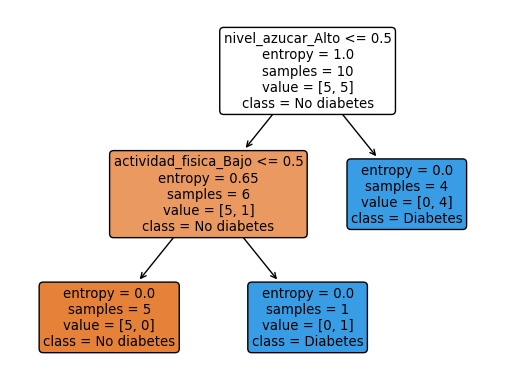

In [12]:
tree.plot_tree(dt, feature_names=X.columns, 
               class_names=['No diabetes', 'Diabetes'], 
               filled=True, rounded=True);

<h2> Índice de impureza de Gini </h2>

Otro índice que podemos utilizar en lugar de la entropía es el índice de impureza de Gini, que es una medida para evaluar la homogeneidad de un conjunto de datos en términos de la distribución de las clases de salida. Este índice calcula la probabilidad de que un elemento seleccionado al azar sea clasificado incorrectamente si se clasifica al azar de acuerdo con la distribución de las clases en el conjunto de datos. Un índice de Gini de 0 indica una pureza completa, lo que significa que todas las muestras en un nodo pertenecen a una sola clase, mientras que un valor de 0.5 indica la máxima impureza, lo que sugiere una distribución uniforme de las clases. En los árboles de decisión, el objetivo es minimizar este índice al dividir los nodos de manera que la homogeneidad de las clases aumente en los nodos hijos. Se calcula como

$$Gini = \sum_{i = 1}^{k} p_{i} (1 - p_{1}) = 1 - \sum_{i = 1}^{k} p_{i}^{2}$$

En términos prácticos los resultados de usar la entropía o el índice de Gini no genera muchas diferencias. A continuación, se evidencia esto con el ejemplo que se ha ido desarrollando:

In [13]:
dt2 = tree.DecisionTreeClassifier(criterion = 'gini')
dt2 = dt2.fit(X, y)

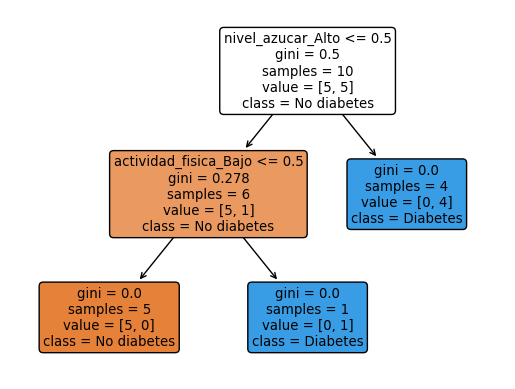

In [14]:
tree.plot_tree(dt2, feature_names=X.columns, 
               class_names=['No diabetes', 'Diabetes'], 
               filled=True, rounded=True);

<h2> Ejemplo de clasificación </h2>

In [15]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree

In [16]:
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

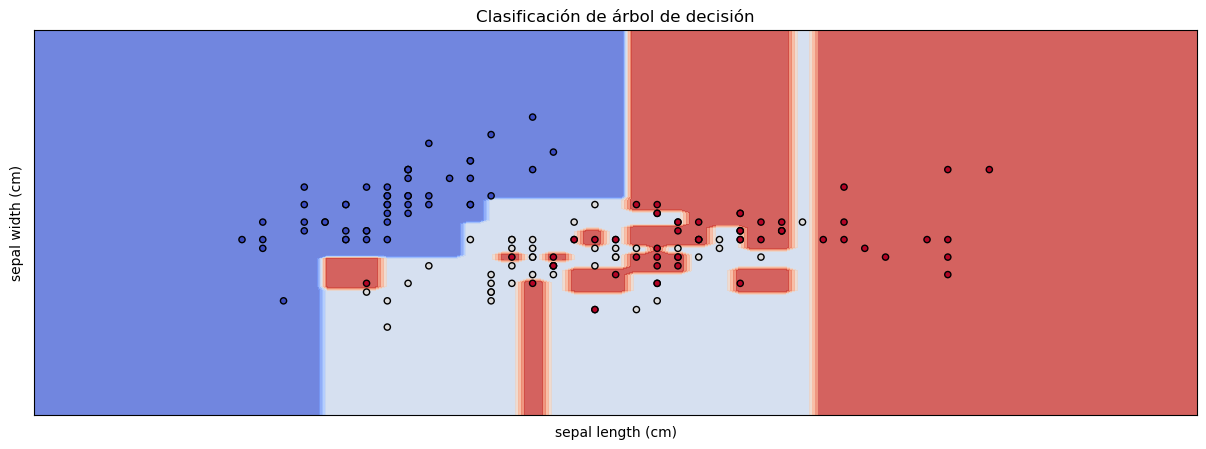

In [17]:
# Grilla 2*2 para las imágenes
X0, X1 = X['sepal length (cm)'], X['sepal width (cm)']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Clasificación de árbol de decisión')

plt.show()

<h2> Consideraciones sobre los árboles de decisión </h2>

**Ventajas**:

- **Son fáciles de interpretar**: Todo el recorrido de los árboles de decisión pueden ser explicados utilizando lógica booleana, lo que los hacen relativamente sencillos de explicar.

- **El modelo no requiere mucho preprocesamiento**: El modelo funciona de igual forma independientemente de la escala de las variables e independientemente de si estas son categóricas o numéricas.

- **Modelo no costoso**: Computacionalmente los árboles de decisión no son tan costosos con forme crece el tamaño del problema.

**Desventajas**:

- **Propensos al sobreajuste**: Los árboles de decisión tienden a ajustarse demasiado a los datos de entrenamiento, lo que puede resultar en un rendimiento deficiente en datos no vistos.

- **Inestabilidad**: Pequeños cambios en los datos de entrenamiento pueden llevar a cambios significativos en la estructura del árbol, lo que lo hace inestable.

- **Sensibles a datos desbalanceados**: Pueden generar árboles sesgados hacia las clases dominantes en datos desbalanceados, lo que afecta su capacidad para generalizar bien en todas las clases.

- **No adecuados para variables continuas**: Los árboles de decisión tienden a no funcionar tan bien con variables continuas en comparación con las variables categóricas.

- **Poca interpretabilidad en árboles profundos**: Los árboles de decisión profundos pueden ser difíciles de interpretar y visualizar, lo que limita su utilidad en entornos donde la explicabilidad es importante.

<h2> Caso de regresión </h2>

En el caso de los árboles de regresión, la predicción de una variable corresponde a la tendencia central (típicamente la media) de la variable dependiente en el nodo terminal. Por defecto, el árbol de decisión no tiene un límite para crecer, sin embargo, es una buena práctica limitar el máximo largo para evitar el sobreentrenamiento. En caso contrario, el árbol crecerá hasta que la variable dependiente sea completamente pura.

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

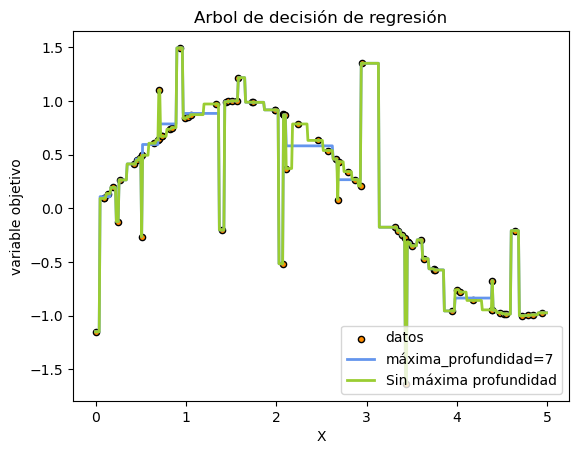

In [19]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=7)
regr_2 = DecisionTreeRegressor()
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="datos")
plt.plot(X_test, y_1, color="cornflowerblue", label="máxima_profundidad=7", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Sin máxima profundidad", linewidth=2)
plt.xlabel("X")
plt.ylabel("variable objetivo")
plt.title("Arbol de decisión de regresión")
plt.legend()
plt.show()

<h2> Ejemplo de regresión con datos del precio de casas de California </h2>

In [20]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.datasets import fetch_california_housing

In [22]:
data = fetch_california_housing()

In [23]:
X = data['data']
y = data['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
dt_regressor = DecisionTreeRegressor()

In [26]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[C

In [28]:
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [29]:
y_pred = grid_search.predict(X_test)

mean_squared_error(y_test, y_pred)

0.4085663601188524

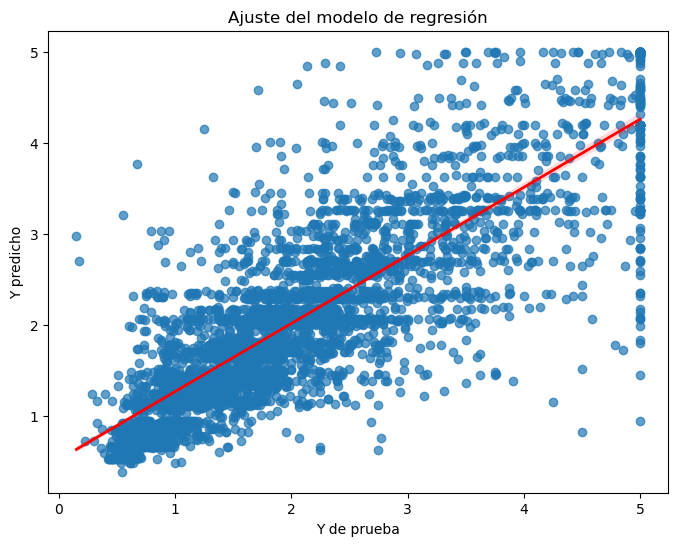

In [30]:
# regplot for decision tree
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, 
            y=y_pred, 
            scatter_kws={'alpha':0.7}, line_kws={'color': 'red', 'linestyle': '-', 'linewidth': 2})

plt.xlabel('Y de prueba')
plt.ylabel('Y predicho')
plt.title('Ajuste del modelo de regresión')
plt.show()